In [10]:
import numpy as np 
import cv2
from skimage.feature import local_binary_pattern
import time

In [2]:
import os
directory_list = list()
dir_path = "dataset"
for root, dirs, files in os.walk(dir_path, topdown=False):
    for name in dirs:
        directory_list.append((name))
#print(directory_list)
for directory in directory_list:
    print(directory)

catagory_0
catagory_1
catagory_2


In [3]:
import glob

labels = 'labels.csv'
labelfile = open(labels,'w')
for i in range(len(directory_list)):
    readpath = (dir_path+'/' + directory_list[i]+'/*jpg')
    #print(readpath)
    images = glob.glob(readpath)
    for image in images:
        labelfile.write(image+','+directory_list[i][9:len(directory_list[i])]+'\n')
labelfile.close()

In [4]:
import random
labels = 'labels.csv'
shuffled_labels = 'Shuffled_labels.csv'

labelfile = open(labels, "r")
lines = labelfile.readlines()
labelfile.close()
random.shuffle(lines)

shufflefile = open(shuffled_labels, "w")
shufflefile.writelines(lines)
shufflefile.close()

In [5]:
#to check uniform or not 
def uniform(pattern):
    pat= int(pattern)
    a=0
    b=0
    cnt=0
    for i in range(0,8):
        if( i==0 ):
            a= int(pattern/2**(7-i))
        else:
            b= int(pattern/2**(7-i))
            if(b!=a):
                cnt=cnt+1
                a=b
        pattern=pattern%2**(7-i)
    if(cnt<=2):
        return 1 #uniform hbe
    else:
        return 0
items = []
true_items = []
for i in range(0, 256):
    if uniform(i):
        items.append(i)
        true_items.append(i)
        
items.append(250)
true_items.append(250)
print(len(items))


59


In [6]:
import cv2
import numpy as np
def get(image, idx, idy):
    if idx < (len(image)) and idy < len(image[0]) and idx>=0 and idy >=0:
        return 1
    else:
        return 0
    
def dir(x,y,img):
	ax=int(img[x+1,y])-int(img[x,y])
	ay=int(img[x,y-1])-int(img[x,y])
    
	if ax>=0 and ay>=0:
		return 1
	elif ax<0 and ay>=0:
		return 2
	elif ax<0 and ay<0:
		return 3
	elif ax>=0 and ay<0:
		return 4
		
def d_lbp(x,y,img):
    out=[]
    fx=[0,-1,-1,-1,0,1,1,1]
    fy=[1,1,0,-1,-1,-1,0,1]
    val = img[x][y]
    for i in range(0, 8):
        n_x = x+fx[i]
        n_y = y+fy[i]
        val1=img[n_x][n_y]
        if val1>=val:
            out.append(1)
        else:
            out.append(0)
    #print(out)
    return out

def add_dict(dic, val):
    if val not in dic.keys():
        dic[250] = dic[250] + 1
    else:
        dic[val] = dic[val] + 1

def lbp(img, dic1):
    fx=[0,-1,-1,-1,0,1,1,1]
    fy=[1,1,0,-1,-1,-1,0,1]
    for x in range(1, len(img)-1):
        for y in range(1, len(img[x])-1):
            value = d_lbp(x,y,img)
            val1=0
            for i in range(len(value)):
                if(value[i]==1):
                    val1+=2**(7-i)
            add_dict(dic1, val1)
    return dic1

In [11]:

df = pd.read_csv(shuffled_labels, header=None)
rows = df.iterrows()

X_addrs = []
X_hist = []
Y_hist = []
#row = rows[0]
j = 0

# uncomment below this for local tetra pattern
dic1 = {}


def create_dic():
    for i in range(len(items)):
        dic1[items[i]] = 0

start_time = time.time()   

for row in rows:
    #print(row[1][1])
    create_dic()
    img = cv2.imread(row[1][0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    new_x = []
    dic1 = lbp(img,dic1)
    
    x1 = []
    for i in dic1.keys():
        x1.append(dic1[i])
    x1 = np.array(x1)
    #print(x1)
    x1 = x1/np.sum(x1)
    
    new_x = x1.tolist()
    
    X_hist.append(new_x)
    X_addrs.append(row[1][0])
    Y_hist.append(row[1][1])
    if j%100 == 0:
        elapsed_time = time.time() - start_time
        print(str(j) +" "+str(row[1][0])+"  label = "+str(row[1][1]) + " done in " + str(elapsed_time))
        start_time = time.time()
    j = j + 1
    
'''
for row in rows:
    #print(row[1][1])
    im = cv2.imread(row[1][0])
    #print(im.shape)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    radius = 3
    # Number of points to be considered as neighbourers 
    no_points = 8 * radius
    lbp = local_binary_pattern(im_gray, no_points, radius, method='uniform')
    # Calculate the histogram
    x = itemfreq(lbp.ravel())
    dic = {}
    for i in range(len(x)):
        dic[x[i][0]] = x[i][1]
    for i in range(26):
        if i not in dic.keys():
            dic[i] = 0
    x = [[0]*2]*26
    for i in range(26):
        x[i][0] = i
        x[i][1] = dic[i]
    # Normalize the histogram
    #print(len(x))
    if(len(x) != 26):
        print(x)
    #x = np.array(x)
    new_x = []
    for i in range(26):
        new_x.append(dic[i])
    new_x = np.array(new_x)
    hist = new_x/np.sum(new_x)
    #hist = x[:, 1]/sum(x[:, 1])
    # Append image path in X_name
    X_addrs.append(row[1][0])
    # Append histogram to X_name
    X_hist.append(hist)
    # Append class label in y_test
    Y_hist.append(row[1][1])
    if(j%100==0):
        print(str(j)+" done ")
    j = j + 1
'''

0 dataset/catagory_2\D2_300_3.jpg  label = 2 done in 0.48671960830688477
100 dataset/catagory_2\D2_150_11.jpg  label = 2 done in 44.750425815582275
200 dataset/catagory_1\D1_0_10.jpg  label = 1 done in 48.25942325592041
300 dataset/catagory_1\D1_0_16.jpg  label = 1 done in 52.83280611038208
400 dataset/catagory_1\D1_270_1.jpg  label = 1 done in 39.903316497802734
500 dataset/catagory_0\D112_270_18.jpg  label = 0 done in 33.079092025756836


'\nfor row in rows:\n    #print(row[1][1])\n    im = cv2.imread(row[1][0])\n    #print(im.shape)\n    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)\n    radius = 3\n    # Number of points to be considered as neighbourers \n    no_points = 8 * radius\n    lbp = local_binary_pattern(im_gray, no_points, radius, method=\'uniform\')\n    # Calculate the histogram\n    x = itemfreq(lbp.ravel())\n    dic = {}\n    for i in range(len(x)):\n        dic[x[i][0]] = x[i][1]\n    for i in range(26):\n        if i not in dic.keys():\n            dic[i] = 0\n    x = [[0]*2]*26\n    for i in range(26):\n        x[i][0] = i\n        x[i][1] = dic[i]\n    # Normalize the histogram\n    #print(len(x))\n    if(len(x) != 26):\n        print(x)\n    #x = np.array(x)\n    new_x = []\n    for i in range(26):\n        new_x.append(dic[i])\n    new_x = np.array(new_x)\n    hist = new_x/np.sum(new_x)\n    #hist = x[:, 1]/sum(x[:, 1])\n    # Append image path in X_name\n    X_addrs.append(row[1][0])\n    # Appen

In [8]:
import pandas as pd 
df = pd.DataFrame(X_hist)
df.to_csv("lbp_X_hist.csv",header=None)
df = pd.DataFrame(Y_hist)
df.to_csv("lbp_Y_hist.csv",header=None)

print(X_addrs[0])
print(X_hist[0])
print(Y_hist[0])
#print(X_hist)
X_hist = np.array(X_hist)
Y_hist = np.array(Y_hist)
print(len(X_addrs))
print(len(X_hist[50]))
print(X_hist.shape)
#print((Y_hist))



full_dataset/catagory_28\D28_330_3.jpg
[0.05020156210632401, 0.00944822373393802, 0.011526832955404385, 0.010770975056689343, 0.008755353993449231, 0.01127488032249937, 0.014613252708490804, 0.01146384479717813, 0.007684555303602922, 0.012219702695893172, 0.014991181657848324, 0.006928697404887881, 0.008062484252960444, 0.009385235575711767, 0.01253464348702444, 0.011778785588309398, 0.0100151171579743, 0.00944822373393802, 0.011652809271856891, 0.01436130007558579, 0.011085915847820609, 0.010330057949105569, 0.00781053162005543, 0.010519022423784328, 0.014613252708490804, 0.016628873771730914, 0.014802217183169564, 0.009385235575711767, 0.010456034265558075, 0.011085915847820609, 0.009259259259259259, 0.014235323759133283, 0.01782564877802973, 0.016817838246409676, 0.01291257243638196, 0.009574200050390527, 0.00781053162005543, 0.00963718820861678, 0.013731418493323256, 0.01669186192995717, 0.011652809271856891, 0.012849584278155708, 0.011652809271856891, 0.014298311917359537, 0.01158

In [9]:
'''
def feature_distance(feature1, feature2):
    dist = 0.0
    for i in range(len(feature1)):
        dist += abs((feature1[i]*1.0-feature2[i]*1.0)/(1.0+feature1[i]*1.0+feature2[i]*1.0))
        #print(dist)
    return dist
x = X_hist
print(x.shape)
#print(unique_name[X_addrs[0]])
print(Y_hist[0])
print(Y_hist[1])
print(feature_distance(x[0], x[10]))
distance_list = []
query = x[0]
query_index = 0
for i in range(len(Y_hist)):
    distance_list.append(feature_distance(query, x[i]))
unsorted = zip(distance_list, Y_hist)
sorted_touple = sorted(unsorted, key = lambda element : element[0])
print(len(sorted_touple))
#50 0.26
#45 0.28
#40 0.325
#35 0.371
#30 0.43
#25 0.48
#20 0.6
#15 0.6
#10 0.8
#5 0.8

query_length =5
true_val = 0
false_val = 0
for i in range(query_length):
    if(sorted_touple[i][1] == Y_hist[query_index]):
        true_val = true_val + 1
    else:
        print("this is wrong "+str(i)+" no image is  confusing with "+str(sorted_touple[i][1]))
        false_val = false_val+1
print(true_val*1.0/query_length*1.0)
'''

'\ndef feature_distance(feature1, feature2):\n    dist = 0.0\n    for i in range(len(feature1)):\n        dist += abs((feature1[i]*1.0-feature2[i]*1.0)/(1.0+feature1[i]*1.0+feature2[i]*1.0))\n        #print(dist)\n    return dist\nx = X_hist\nprint(x.shape)\n#print(unique_name[X_addrs[0]])\nprint(Y_hist[0])\nprint(Y_hist[1])\nprint(feature_distance(x[0], x[10]))\ndistance_list = []\nquery = x[0]\nquery_index = 0\nfor i in range(len(Y_hist)):\n    distance_list.append(feature_distance(query, x[i]))\nunsorted = zip(distance_list, Y_hist)\nsorted_touple = sorted(unsorted, key = lambda element : element[0])\nprint(len(sorted_touple))\n#50 0.26\n#45 0.28\n#40 0.325\n#35 0.371\n#30 0.43\n#25 0.48\n#20 0.6\n#15 0.6\n#10 0.8\n#5 0.8\n\nquery_length =5\ntrue_val = 0\nfalse_val = 0\nfor i in range(query_length):\n    if(sorted_touple[i][1] == Y_hist[query_index]):\n        true_val = true_val + 1\n    else:\n        print("this is wrong "+str(i)+" no image is  confusing with "+str(sorted_touple[

(21056, 60)


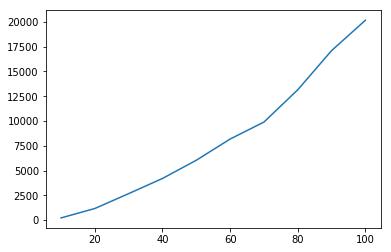

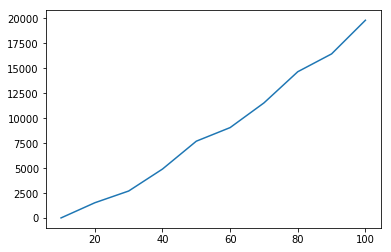

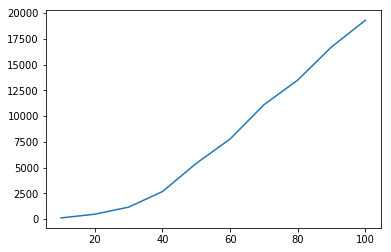

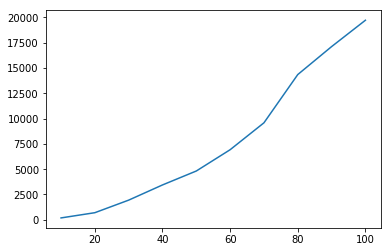

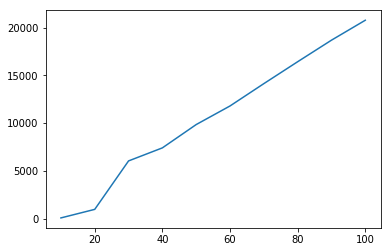

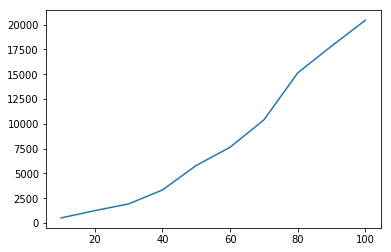

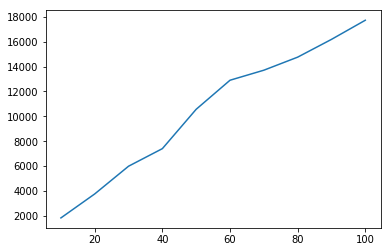

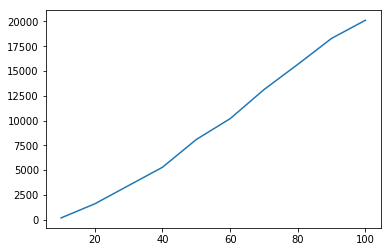

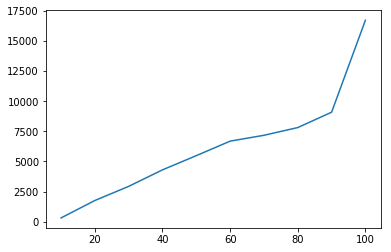

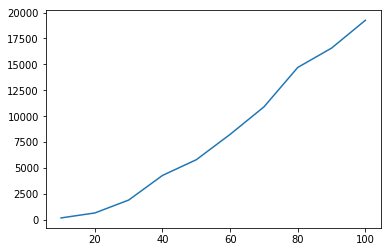

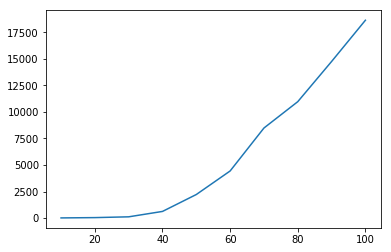

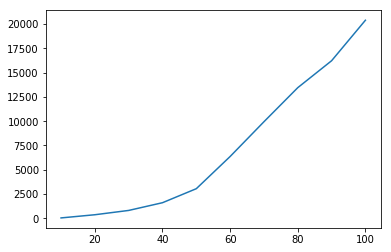

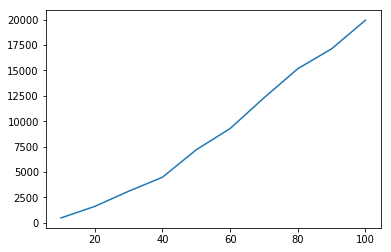

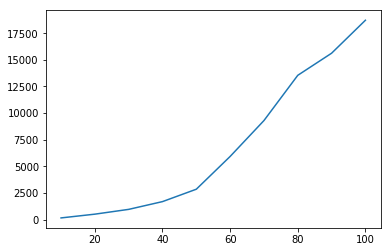

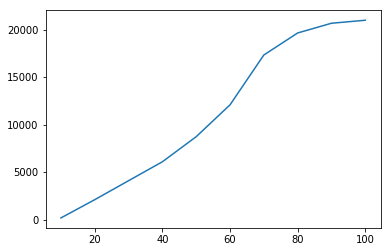

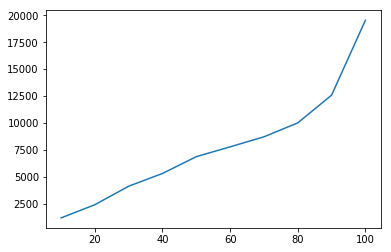

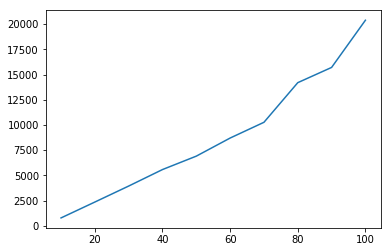

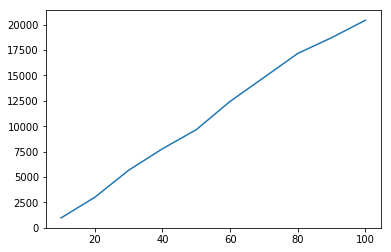

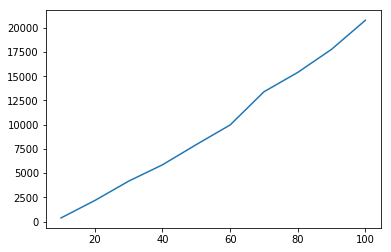

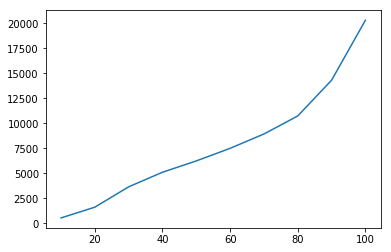

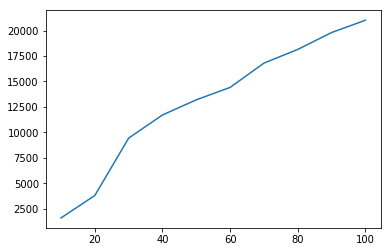

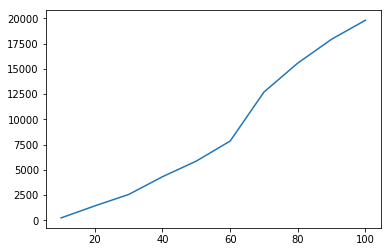

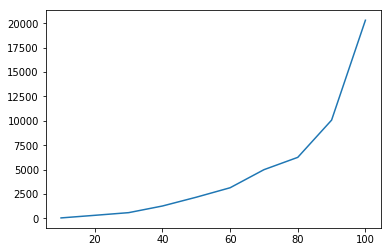

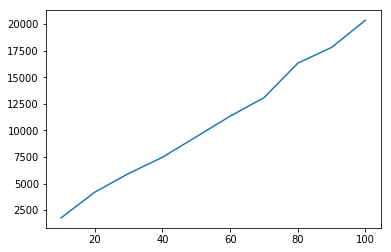

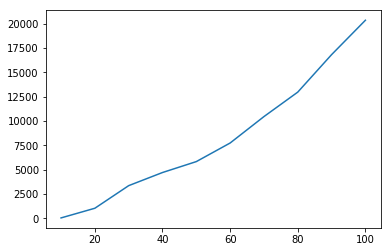

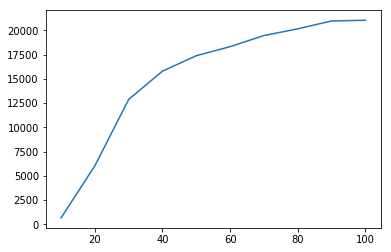

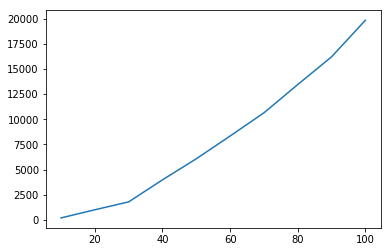

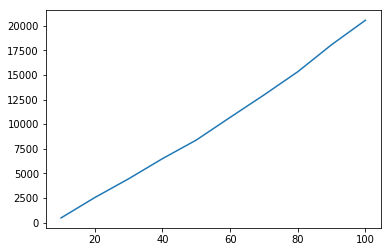

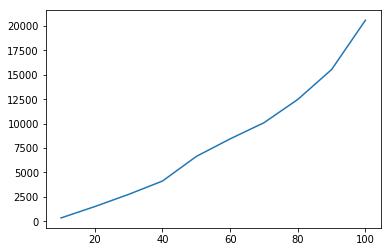

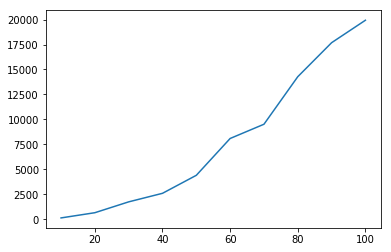

In [23]:


X_hist =pd.read_csv('lbp_X_hist.csv', sep=',',header=None)
X_hist = np.array(X_hist)
Y_hist= pd.read_csv('lbp_Y_hist.csv', sep=',',header=None)
Y_hist = np.array(Y_hist)

#print(Y_hist[:, 1])
#this code is to use the distance function
def feature_distance(feature1, feature2):
    dist = 0.0
    for i in range(len(feature1)):
        dist += abs((feature1[i]*1.0-feature2[i]*1.0)/(1.0+feature1[i]*1.0+feature2[i]*1.0))
        #print(dist)
    return dist
x = X_hist
print(x.shape)
#print(unique_name[X_addrs[0]])
#print(Y_hist[0])
#print(Y_hist[1])
#print(feature_distance(x[0], x[10]))

#60 -> 0.
#50->0.
#40->0.
#35->0.
#30->0.


import matplotlib.pyplot as plt
import random
per_class = 188

def clc():
    #query_length = 70
    
    sm = 0
    run = 30
    for j in range(run):
        x_cord = []
        y_cord = []
        cnt = 10
        true_val = 0
        false_val = 0
        distance_list = []
        query_index = random.randint(1,x.shape[0])
        query = x[query_index]
        for i in range(len(Y_hist)):
            distance_list.append(feature_distance(query, x[i]))
            #print(feature_distance(query, x[i]))
            
        unsorted = zip(distance_list, Y_hist[:, 1])
        print(unsorted)
        sorted_touple = sorted(unsorted, key = lambda element : element[0])
        #print(len(sorted_touple))
        for i in range(len(sorted_touple)):
            if(sorted_touple[i][1] == Y_hist[query_index][1]):
                true_val = true_val + 1
                if(true_val==int((cnt/100.0)*per_class)):
                    #print(i+1, " instances needed for ",cnt, "% meaning",true_val, "no of images retrival")
                    x_cord.append(cnt)
                    y_cord.append(i+1)
                    cnt += 10.0
            else:
                #print("this is wrong "+str(i)+" confusing with "+str(sorted_touple[i][1]))
                false_val = false_val+1
        plt.plot(x_cord,y_cord)
        plt.show()
        #sm = sm + true_val*1.0/query_length*1.0
        #print(true_val*1.0/query_length*1.0)
        
   # return sm/run
#print("avg = ", clc())
clc()

In [ ]:
X_hist = np.array(X_hist)
Y_hist = np.array(Y_hist)

print(X_hist.shape, Y_hist.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_hist), np.array(Y_hist), test_size=0.3)
X_train = np.array(X_train)
print(len(X_train))

'''
for i in range(len(X_train)):
    if(len(X_train[i]) != 26):
       print(len(X_train[i]))
'''


In [ ]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
#clf = svm.SVC()
#clf = GaussianNB()
#clf = LogisticRegression()
#clf = MLPClassifier(alpha=1)
#clf = AdaBoostClassifier()
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()

#X_train = np.array(X_train)
print(type(X_train))

clf.fit(X_train,Y_train)

clf.score(X_test, Y_test)

In [ ]:
import pickle
from sklearn.model_selection import cross_val_score
#clf = pickle.load(open('RandomForest_model.sav', 'rb'))
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
scores = cross_val_score(clf,X_test,Y_test,cv=5)
print((scores))
clf.score(X_test, Y_test)

In [ ]:
import pickle
#for saving model
filename = 'DecisionTree_model.sav'
#pickle.dump(clf, open(filename, 'wb'))
clf = pickle.load(open('DecisionTree_model.sav', 'rb'))
clf.score(X_test, Y_test)
#scores = cross_val_score(clf, X_test, Y_test, cv=20)
#print((scores))

In [ ]:
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

from sklearn.svm import SVC

clf = SVC()
print(type(y))
clf.fit(X, y) 
print(clf.predict([[-0.8, -1]]))

In [ ]:
a = [0]*26
a = np.array(a)
b = a.copy()
b = [0]*14
b = np.array(b)
print(b.shape)
c = a+b
print(c)

In [ ]:
#lbp-> Local derivative ternary lbp last e  tetra 